# **Submission Project Convolutional Neural Network (Rock, Paper, Sciccors)**

---


Maisy Amelia Silvani

---


email: maisyamelia@gmail.com

In [1]:
import tensorflow as tf
print("TensorFlow version : ", tf.__version__)

#Prepare the data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip


TensorFlow version :  2.5.0
--2021-07-07 09:10:36--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.41MB/s    in 76s     

2021-07-07 09:11:53 (4.04 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
#Extracting zip data
import zipfile, os 
local_zip = "/tmp/rockpaperscissors.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp")
zip_ref.close()

#Split train data and validation data using splitfolders
!pip install split-folders


In [3]:
import splitfolders
base_dir = "/tmp/rockpaperscissors/rps-cv-images"
print("Isi direktori /rockpaperscissors/rps-cv-images : ", os.listdir(base_dir)) #isi direktori rps-cv-images
splitfolders.ratio(base_dir, output = "/tmp/rockpaperscissors/", seed = 1337, ratio = (.8, .2))
train_dir = os.path.join("/tmp/rockpaperscissors", "train")
validation_dir = os.path.join("/tmp/rockpaperscissors", "val")

#Train & validation data generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = "nearest", validation_split = 0.4)
validation_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = "nearest", validation_split = 0.4)

train_generator = train_datagen.flow_from_directory(base_dir, target_size = (150, 150), class_mode = "sparse", subset = "training")
validation_generator = validation_datagen.flow_from_directory(base_dir, target_size = (150, 150), class_mode = "sparse", subset = "validation")

Copying files: 0 files [00:00, ? files/s]

Isi direktori /rockpaperscissors/rps-cv-images :  ['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']


Copying files: 2188 files [00:00, 3531.76 files/s]


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

#compile model
model.compile(optimizer=tf.optimizers.Adam(), loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])


In [5]:
#train model
model.fit(train_generator, steps_per_epoch=25, epochs=20, validation_data=validation_generator, validation_steps=5, verbose=2)


Epoch 1/20
25/25 - 41s - loss: 1.0452 - accuracy: 0.4558 - val_loss: 0.8680 - val_accuracy: 0.5750
Epoch 2/20
25/25 - 41s - loss: 0.5804 - accuracy: 0.7675 - val_loss: 0.3263 - val_accuracy: 0.9062
Epoch 3/20
25/25 - 40s - loss: 0.3314 - accuracy: 0.8792 - val_loss: 0.2995 - val_accuracy: 0.9062
Epoch 4/20
25/25 - 39s - loss: 0.2598 - accuracy: 0.9026 - val_loss: 0.2795 - val_accuracy: 0.9125
Epoch 5/20
25/25 - 39s - loss: 0.2048 - accuracy: 0.9286 - val_loss: 0.2238 - val_accuracy: 0.9312
Epoch 6/20
25/25 - 39s - loss: 0.2098 - accuracy: 0.9247 - val_loss: 0.3050 - val_accuracy: 0.8750
Epoch 7/20
25/25 - 39s - loss: 0.1731 - accuracy: 0.9364 - val_loss: 0.1069 - val_accuracy: 0.9750
Epoch 8/20
25/25 - 39s - loss: 0.1611 - accuracy: 0.9442 - val_loss: 0.1554 - val_accuracy: 0.9563
Epoch 9/20
25/25 - 40s - loss: 0.1575 - accuracy: 0.9500 - val_loss: 0.1531 - val_accuracy: 0.9375
Epoch 10/20
25/25 - 41s - loss: 0.1454 - accuracy: 0.9563 - val_loss: 0.0743 - val_accuracy: 0.9688
Epoch 11/

In [12]:
#Make sure to also load truncated images
!pip install pillow

Saving IMG20210707134457.jpg to IMG20210707134457.jpg
IMG20210707134457.jpg
This is rock!


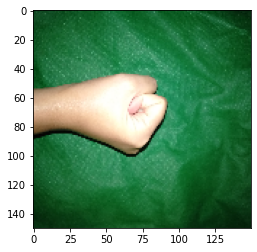

In [14]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size = (150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size = 10)
  print(fn)
  if classes[0, 0]!=0:
    print("Oh! that's paper")
  elif classes[0, 1]!=0:
    print("This is rock!")
  else:
    print("Scissors-hand...")

Here is the result after testing the data with my own hand (shooted from Oppo A3S camera with the flash on).